# Machine Learning - "Regression" - Day 3

Shivam Panchal

---

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://evrythng.com/wp-content/uploads/machine-learning-diagram02-900x535.png", width = 1200)

We will compare several regression methods by using the same dataset. We will try to predict the price of a house as a function of its attributes.

1. 'LR',  LinearRegression(), 
2. 'RANSAC', ransac,
3. 'Lasso', linear_model.Lasso(),
4. 'Ridge', linear_model.Ridge(),
5. 'ElasticNet', linear_model.ElasticNet(),
6. 'Quatratic', PolynomialFeatures(degree=2),
7. 'Cubic', PolynomialFeatures(degree=3),
8. 'Decision Tree', DecisionTreeRegressor(),
9. 'Random Forest', RandomForestRegressor()

---

In [2]:
import pandas as pd
df = pd.read_csv('D://Users/Shivam/Desktop/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Scatter matrix 

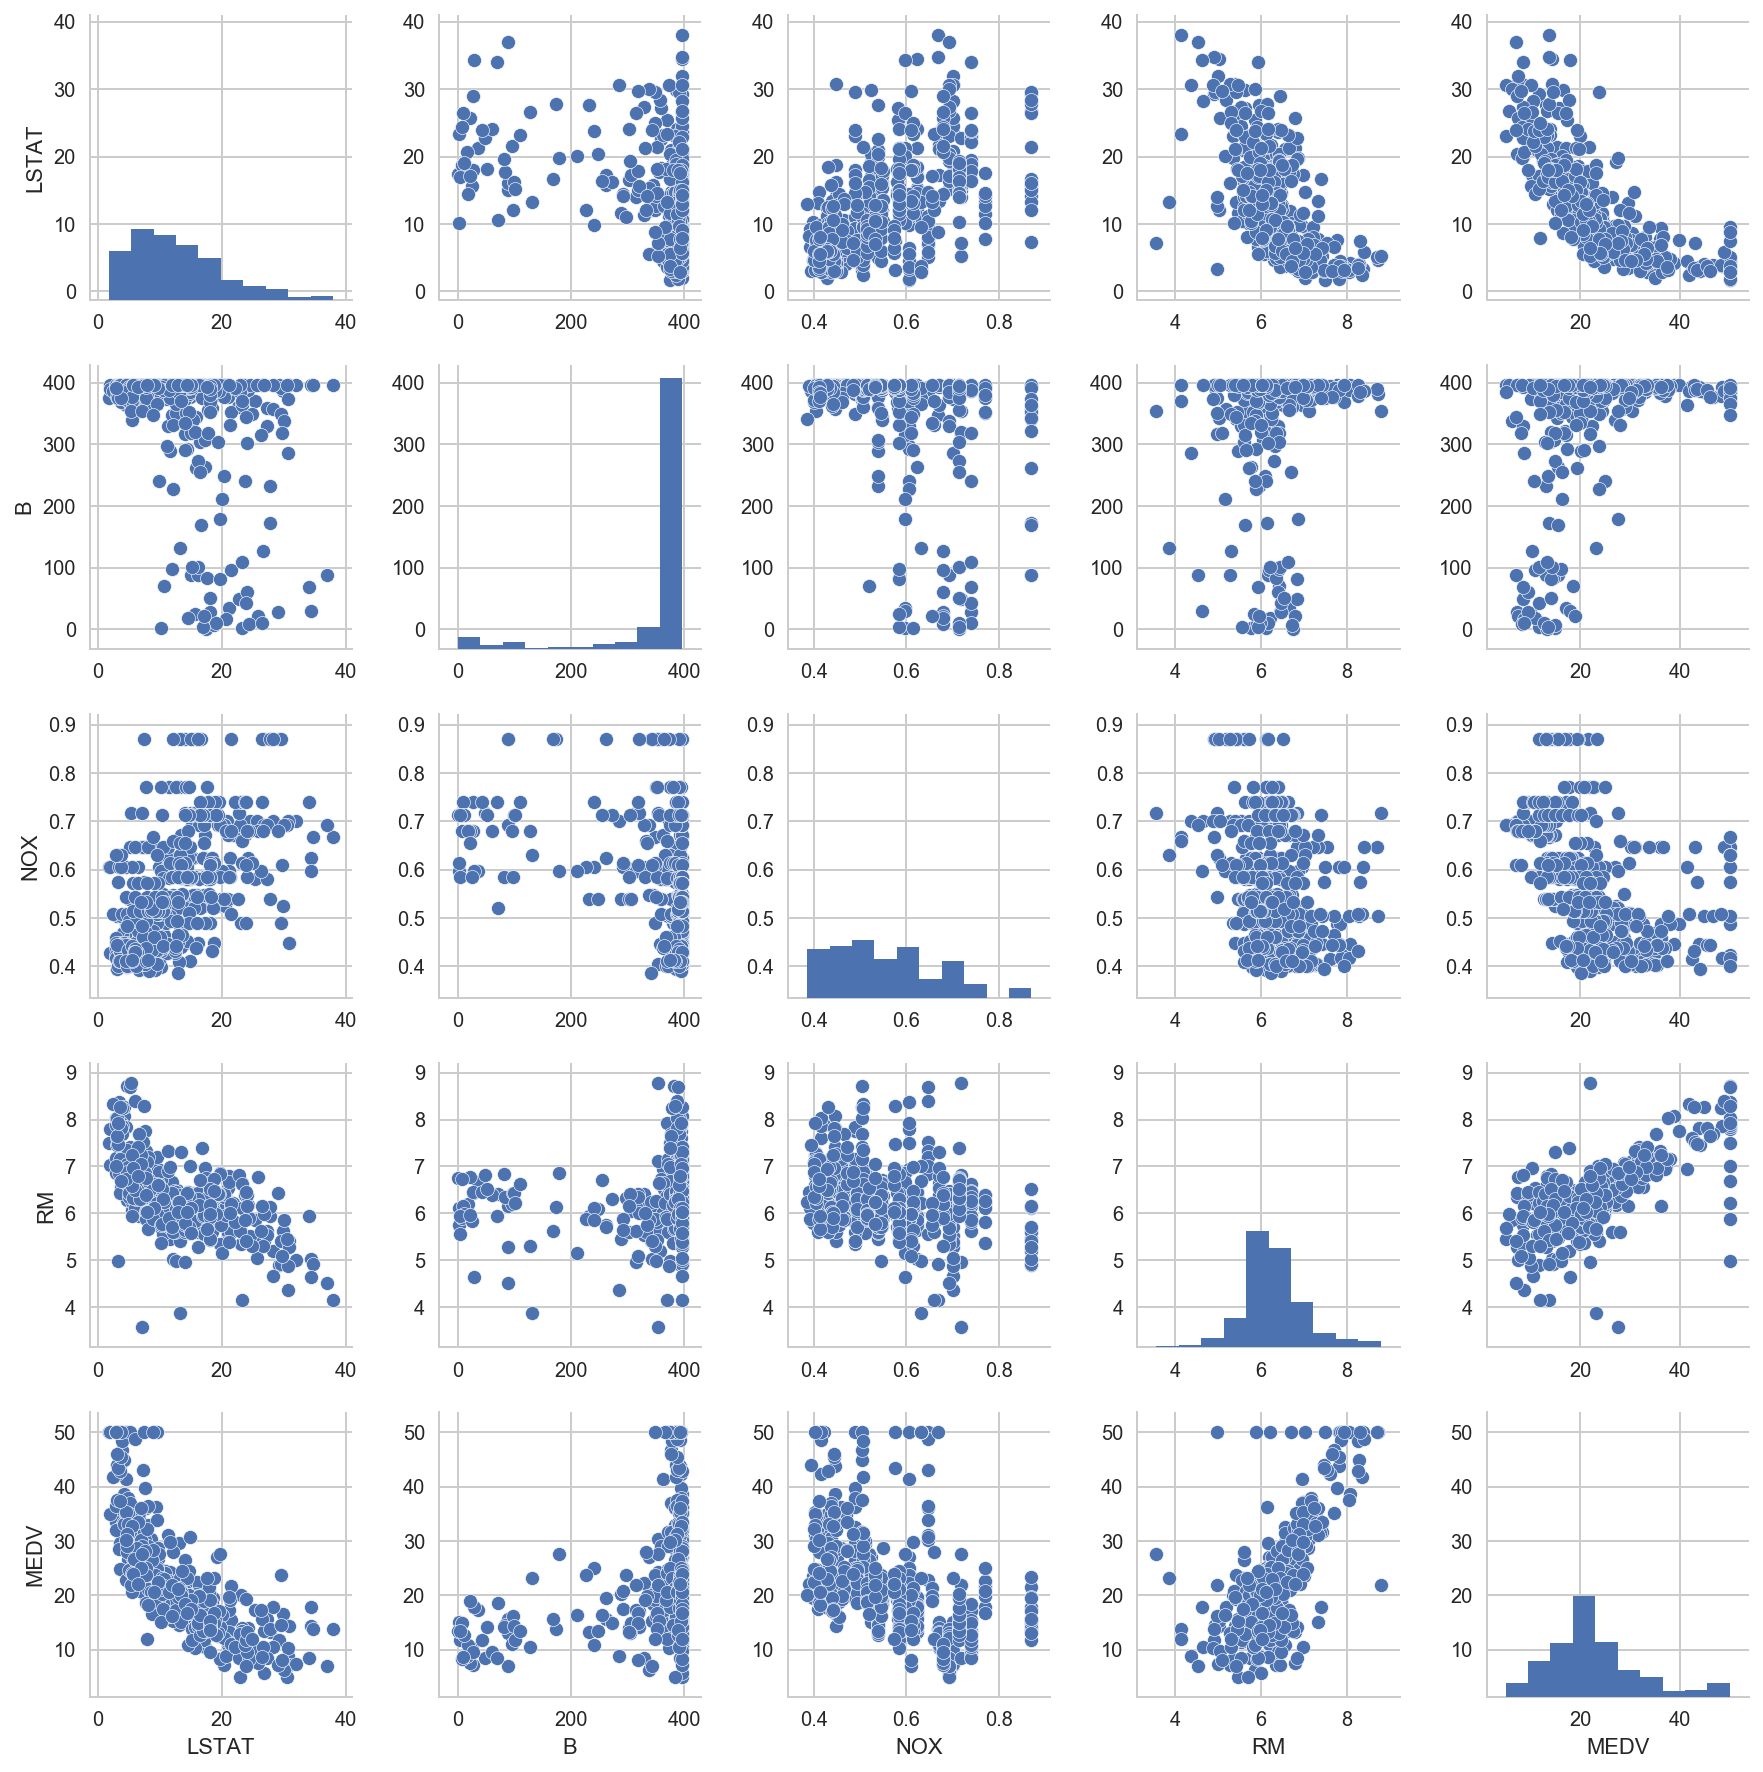

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'B', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.savefig('scatter.png', dpi=300)
plt.show()

## Correlation matrix

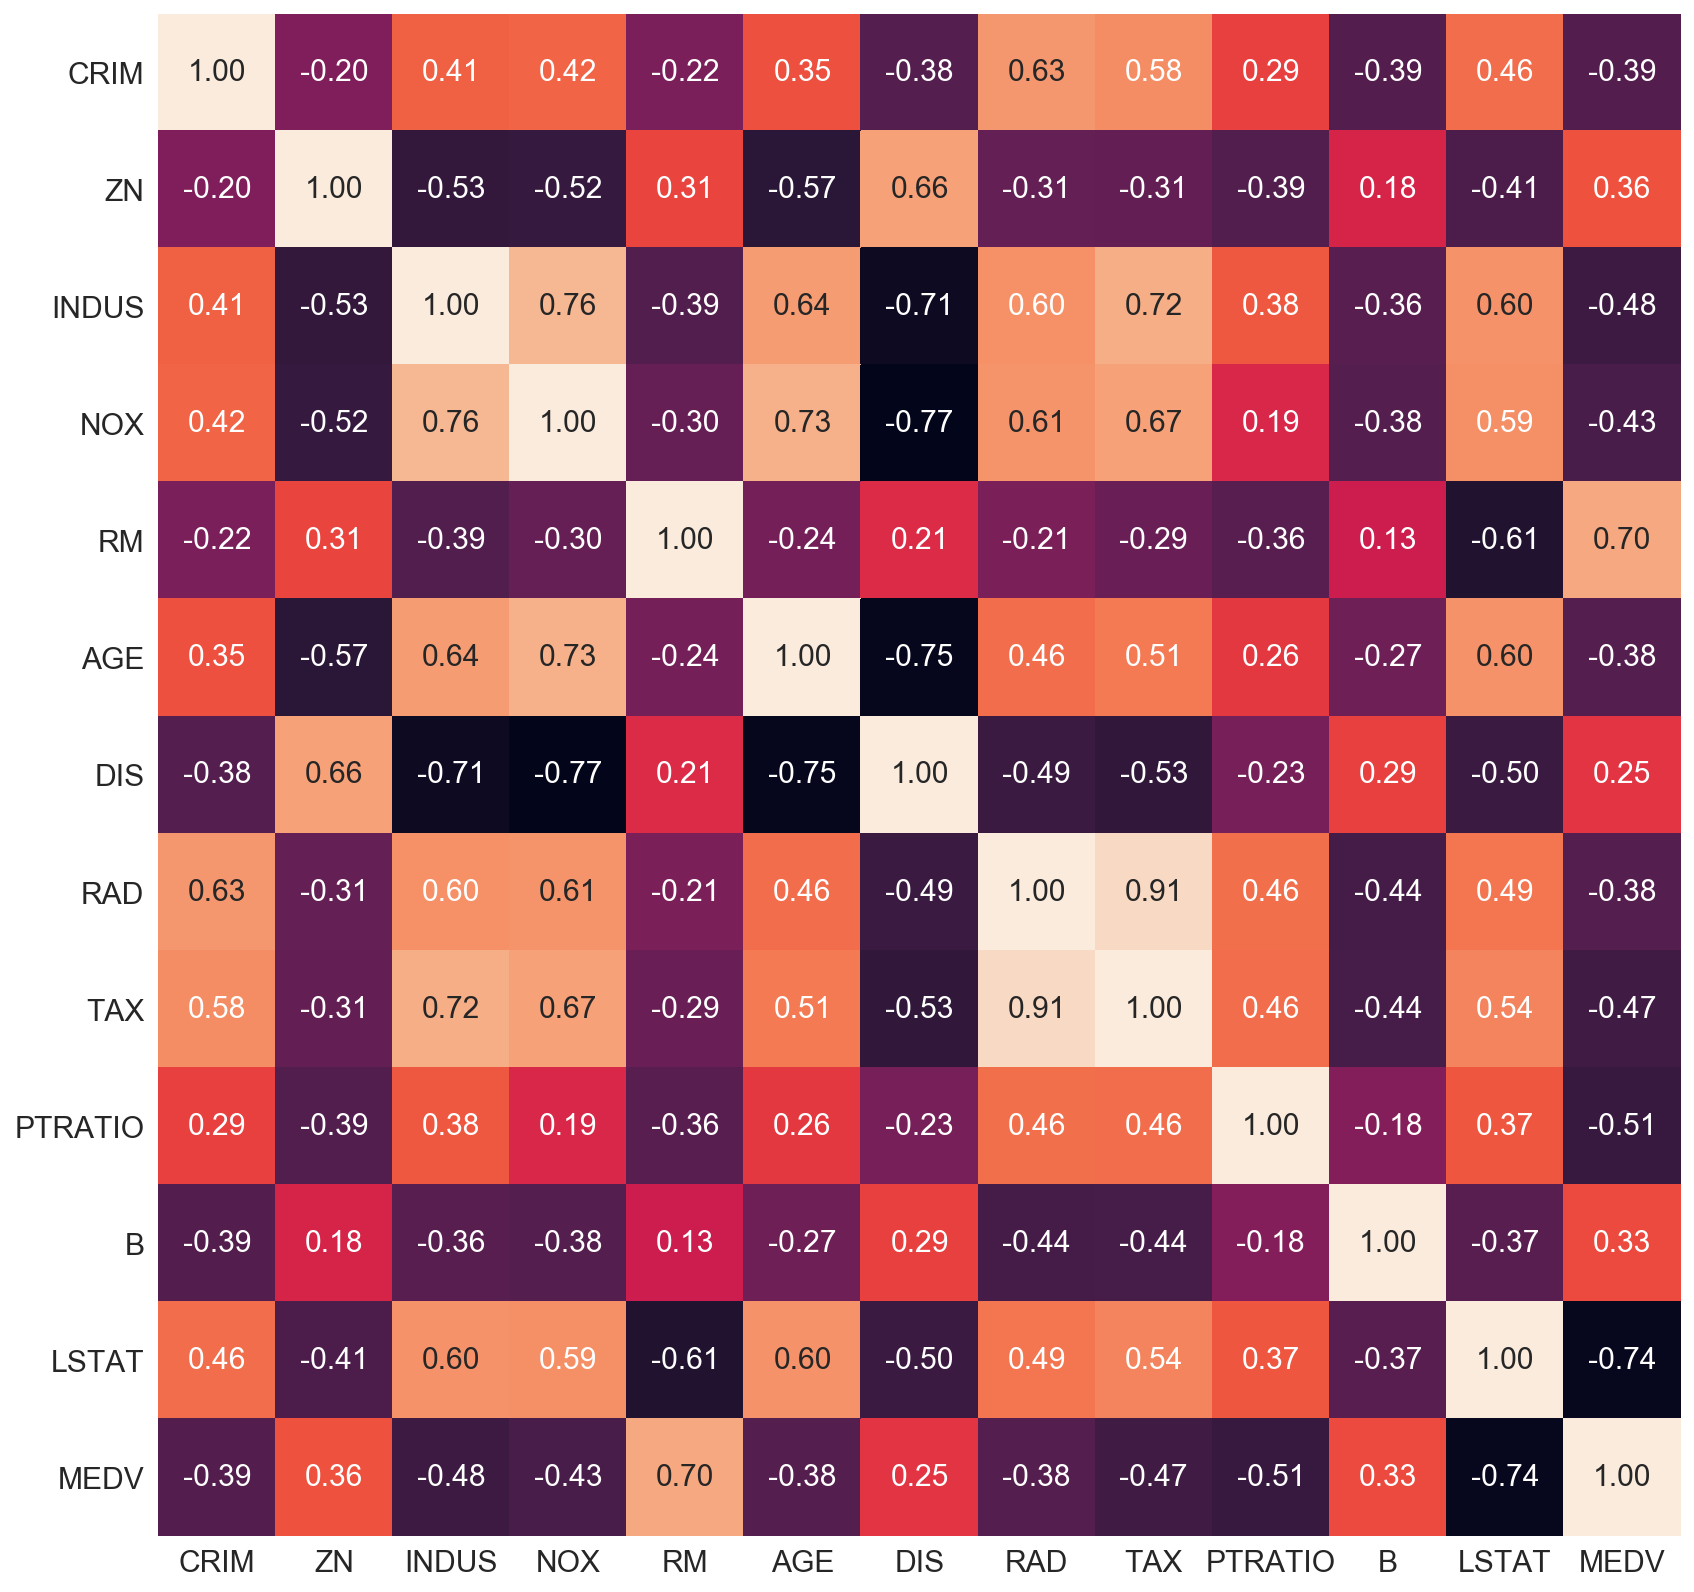

In [4]:
import numpy as np

corr_cols = ['CRIM', 'ZN', 'INDUS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

cm = np.corrcoef(df[corr_cols].values.T)
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(14, 14))

hm = sns.heatmap(cm,
                 ax=ax,
                 cbar=False,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=corr_cols,
                 xticklabels=corr_cols)
plt.savefig('corr_mat.png', dpi=300)

plt.show()

## Evaluating performance

### Train test split

As with classification, we should evaluate our model on data the model didn't see during training

In [5]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Training linear model with all variables

We'll make use of all variables instead of just the one.

In [6]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

### Residual plots for multidimensional models

Visualizing a regression hyperplane only works with 1 (line) or 2 (plane) variables; once we start to make use of more variables in a regression, we need a different way to visualize the model's performance. That's where residual plots come in handy: we see how far off the predicted value is from the true value for each datapoint.

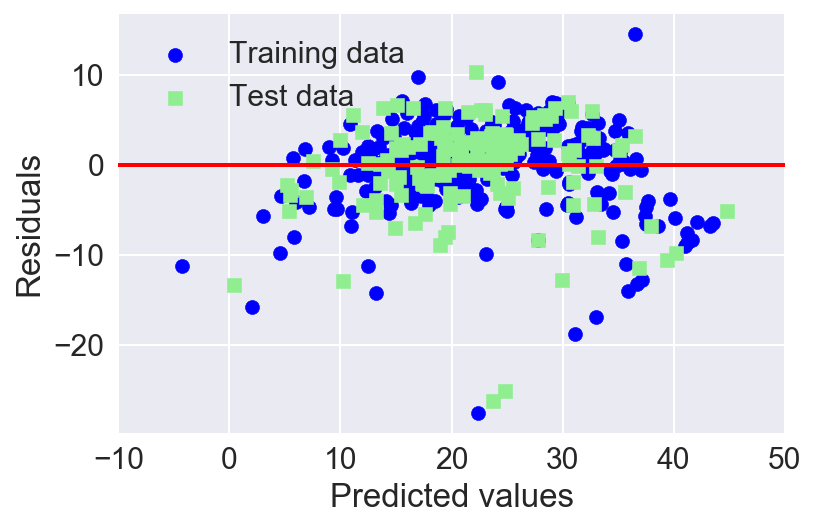

In [7]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()



> for a good regression model, we would expect that the errors are randomly distributed and
the residuals should be randomly scattered around the centerline. If we see patterns in a residual plot, it means that our model is unable to capture some explanatory information, which is leaked into the residuals as we can slightly see in our preceding residual plot. Furthermore, we can also use residual plots to detect outliers, which are represented by the points with a large deviation from the centerline.

### Score



In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [9]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


### Evaluating multiple models

Unlike the book, let's clean things up and use some pipelies as necessary (polynomial transofmration) to make comparing multiple models easier.


In [10]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

In [11]:
models = [
    ('LR', slr), 
    ('Lasso', linear_model.Lasso(alpha=0.1)),
    ('Ridge', linear_model.Ridge(alpha = 0.1)),
    ('ElasticNet', linear_model.ElasticNet(alpha = 0.1)),
    ('Quatratic', Pipeline([
                ('polyxform', PolynomialFeatures(degree=2)),
                ('lr', LinearRegression())
            ])),
    ('Cubic', Pipeline([
                ('polyxform', PolynomialFeatures(degree=3)),
                ('lr', LinearRegression())
            ])),
    ('Decision Tree', DecisionTreeRegressor(max_depth=3)),
    ('Random Forest', RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=1000)),
    ('Extra Trees Regressor', ExtraTreesRegressor())
    
]

In [12]:
r2s = {}
for label, model in models:
    model.fit(X_train, y_train)
    r2_train = r2_score(y_train, model.predict(X_train))
    r2_test = r2_score(y_test, model.predict(X_test))
    r2s[label] = (r2_train, r2_test)
    print('{} R2 scores (train/test): {:2f}/{:2f}'.format(label, r2_train, r2_test))


LR R2 scores (train/test): 0.764545/0.673383
Lasso R2 scores (train/test): 0.753127/0.653209
Ridge R2 scores (train/test): 0.764475/0.672546
ElasticNet R2 scores (train/test): 0.751682/0.652375
Quatratic R2 scores (train/test): 0.951348/0.651666
Cubic R2 scores (train/test): 1.000000/-1030.784775
Decision Tree R2 scores (train/test): 0.851129/0.662887
Random Forest R2 scores (train/test): 0.983379/0.827613
Gradient Boosting Regressor R2 scores (train/test): 0.999991/0.852913
Extra Trees Regressor R2 scores (train/test): 1.000000/0.768534


In [21]:
import pandas as pd

df = pd.DataFrame.from_dict(r2s, orient='index')
df.columns = ['train', 'test']
# df['delta'] = df['train'] - df['test']
df.sort_values(by='test', inplace=True, ascending=False)
df

,train,test
Gradient Boosting Regressor,0.999991,0.852913
Random Forest,0.983379,0.827613
Extra Trees Regressor,1.000000,0.768534
LR,0.764545,0.673383
Ridge,0.764475,0.672546
Decision Tree,0.851129,0.662887
Lasso,0.753127,0.653209
ElasticNet,0.751682,0.652375
Quatratic,0.951348,0.651666
Cubic,1.000000,-1030.784775


In [22]:
df.reset_index(inplace=True)
df.columns = ['Model', 'TrainScore', 'TestScore']

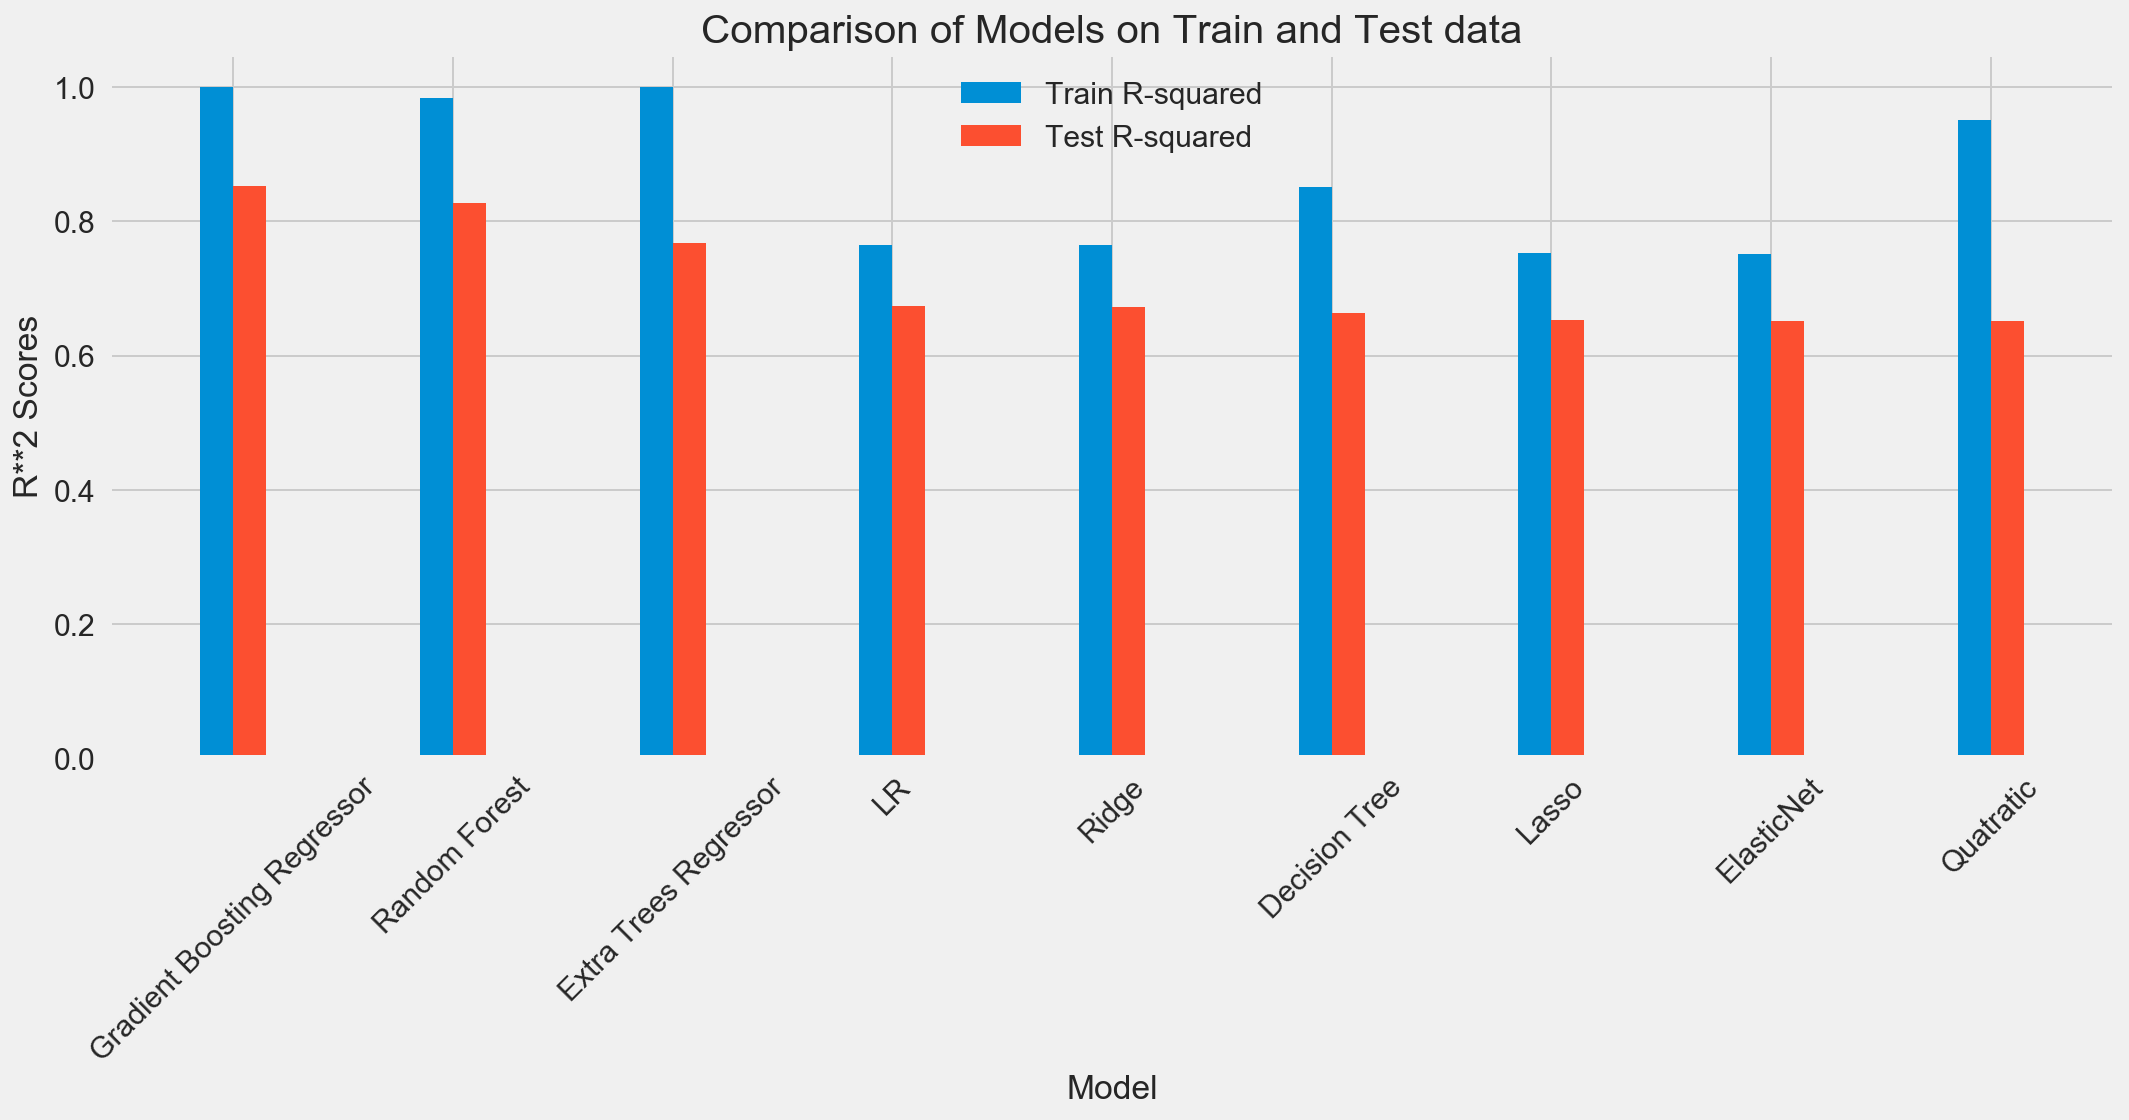

In [23]:
df.drop(df.tail(1).index,inplace=True)
N = df.shape[0]
ind = np.arange(N) 
width = 0.15      
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
plt.bar(ind, df.TrainScore.values,width,
                 label='Train R-squared')
plt.bar(ind + width, df.TestScore.values, width,
                 label='Test R-squared')
plt.xlabel('Model')
plt.ylabel('R**2 Scores')
plt.title('Comparison of Models on Train and Test data')
plt.legend(loc='best')
plt.xticks(ind + width / 2, ('Gradient Boosting Regressor', 'Random Forest',
       'Extra Trees Regressor', 'LR', 'Ridge', 'Decision Tree', 'Lasso',
       'ElasticNet', 'Quatratic'), rotation=45)
plt.tight_layout()
plt.show()

It looks like GBM and Random forest are the best, followed by ET, SLR. 

Also, Further tuning the parameters of the regularized models (ridge, lasso, elastic) might improve performance but meh. Funny how badly cubic overfit the data.

---